# Dataloading and Preprocessing.

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [80]:
# Import the dataset.
df=pd.read_csv(r"G:\100python\Finalytics\Project\Banking\banking_data.csv")

In [81]:
# Explore the dataset with head values.
df.head()

,age,job,marital,marital_status,education,default,balance,housing,loan,contact,day,month,day_month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,married,tertiary,no,2143,yes,no,unknown,5,may,5-May,261,1,-1,0,unknown,no
1,44,technician,single,single,secondary,no,29,yes,no,unknown,5,may,5-May,151,1,-1,0,unknown,no
2,33,entrepreneur,married,married,secondary,no,2,yes,yes,unknown,5,may,5-May,76,1,-1,0,unknown,no
3,47,blue-collar,married,married,unknown,no,1506,yes,no,unknown,5,may,5-May,92,1,-1,0,unknown,no
4,33,unknown,single,single,unknown,no,1,no,no,unknown,5,may,5-May,198,1,-1,0,unknown,no


In [82]:
# Condensed information on dataframe.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45216 entries, 0 to 45215
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             45216 non-null  int64 
 1   job             45216 non-null  object
 2   marital         45213 non-null  object
 3   marital_status  45213 non-null  object
 4   education       45213 non-null  object
 5   default         45216 non-null  object
 6   balance         45216 non-null  int64 
 7   housing         45216 non-null  object
 8   loan            45216 non-null  object
 9   contact         45216 non-null  object
 10  day             45216 non-null  int64 
 11  month           45216 non-null  object
 12  day_month       45216 non-null  object
 13  duration        45216 non-null  int64 
 14  campaign        45216 non-null  int64 
 15  pdays           45216 non-null  int64 
 16  previous        45216 non-null  int64 
 17  poutcome        45216 non-null  object
 18  y     

In [83]:
# Check for null values.
df.isnull().sum()

age               0
job               0
marital           3
marital_status    3
education         3
default           0
balance           0
housing           0
loan              0
contact           0
day               0
month             0
day_month         0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
y                 0
dtype: int64

In [84]:
null_locations = np.where(df.isnull())

In [85]:
print("Locations of null values:")
for row, col in zip(null_locations[0], null_locations[1]):
    print(f"Row: {row}, Column: {col}")

Locations of null values:
Row: 44957, Column: 4
Row: 44996, Column: 2
Row: 44996, Column: 3
Row: 45077, Column: 2
Row: 45077, Column: 3
Row: 45137, Column: 4
Row: 45170, Column: 4
Row: 45209, Column: 2
Row: 45209, Column: 3


In [86]:
len(df)

# Since the length of dataframe is very large comapred to null values we can ignore them.

45216

# Questions:


# Q1:What is the distribution of age among the clients?

In [87]:
df.head()

,age,job,marital,marital_status,education,default,balance,housing,loan,contact,day,month,day_month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,married,tertiary,no,2143,yes,no,unknown,5,may,5-May,261,1,-1,0,unknown,no
1,44,technician,single,single,secondary,no,29,yes,no,unknown,5,may,5-May,151,1,-1,0,unknown,no
2,33,entrepreneur,married,married,secondary,no,2,yes,yes,unknown,5,may,5-May,76,1,-1,0,unknown,no
3,47,blue-collar,married,married,unknown,no,1506,yes,no,unknown,5,may,5-May,92,1,-1,0,unknown,no
4,33,unknown,single,single,unknown,no,1,no,no,unknown,5,may,5-May,198,1,-1,0,unknown,no


In [88]:
mean_age=np.mean(df['age'])
median_age=np.median(df['age'])
std_deviation=np.std(df['age'])

print(f"In the given dataset, the mean age of the clients is {mean_age:.2f}.")
print(f"The median age of the clients is {median_age:.2f}.")
print(f"The standard deviation along mean is {std_deviation:.2f}.")

In the given dataset, the mean age of the clients is 40.94.
The median age of the clients is 39.00.
The standard deviation along mean is 10.62.


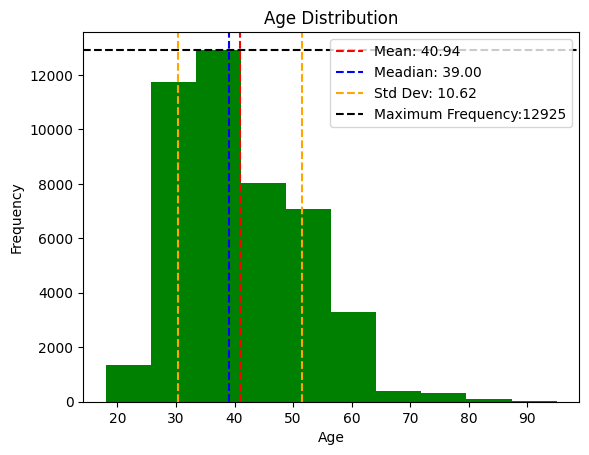

In [89]:
plt.hist(df['age'],color='green')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
hist, bins = np.histogram(df['age'], bins=10)
max_frequency = np.max(hist)

plt.axvline(x=mean_age,color='red',linestyle='--',label=f'Mean: {mean_age:.2f}')
plt.axvline(x=median_age,color='blue',linestyle='--',label=f'Meadian: {median_age:.2f}')
plt.axvline(x=mean_age + std_deviation, color='orange', linestyle='--', label=f'Std Dev: {std_deviation:.2f}')
plt.axvline(x=mean_age - std_deviation, color='orange', linestyle='--')
plt.axhline(y=max_frequency,color='black',linestyle='--',label=f'Maximum Frequency:{max_frequency}')

plt.legend()
plt.show()

Ans to Q1: We plot histogram with the given data of clients. Choosing age as our X-axis and frequency of occurance as Y-axis.
observations:
- The mean age of the clients is 40.94 yrs.
- The median age of the clients is 39.00.
- The standard deviation along mean is 10.62.
- The most number of people fall in the range of 30 to 40 yrs of age.


# Q2: How does the job type vary among the clients?

In [90]:
df.head()

,age,job,marital,marital_status,education,default,balance,housing,loan,contact,day,month,day_month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,married,tertiary,no,2143,yes,no,unknown,5,may,5-May,261,1,-1,0,unknown,no
1,44,technician,single,single,secondary,no,29,yes,no,unknown,5,may,5-May,151,1,-1,0,unknown,no
2,33,entrepreneur,married,married,secondary,no,2,yes,yes,unknown,5,may,5-May,76,1,-1,0,unknown,no
3,47,blue-collar,married,married,unknown,no,1506,yes,no,unknown,5,may,5-May,92,1,-1,0,unknown,no
4,33,unknown,single,single,unknown,no,1,no,no,unknown,5,may,5-May,198,1,-1,0,unknown,no


In [91]:
# Create a data frame with groupby method to identify differnt catagories of jobtype.
df_job_type=df.groupby('job')

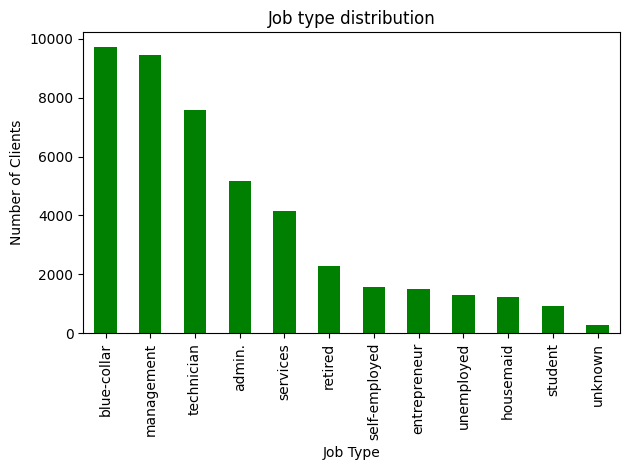

In [92]:
# use size() method to count the number of occurances of all job types
counts=df_job_type.size()
counts=counts.sort_values(ascending=False)

# Plot a bar graph to visulaize the data.
counts.plot(kind='bar',color='green')
plt.title("Job type distribution")
plt.xlabel("Job Type")
plt.ylabel("Number of Clients")
plt.xticks(rotation=90,ha='center')
plt.tight_layout()
plt.show()

In [93]:
# Show the counts of each job type.
print(counts)

job
blue-collar      9732
management       9460
technician       7597
admin.           5171
services         4154
retired          2267
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
dtype: int64


Ans to Q2: 
- The higest job type among clients is blue-collar with 9732 counts.
- The lowest job type among clinets is unknown with 288 counts.
- Job types admin, blue-collar, managemnet and techincian make up most job types with total count of : *31960* and rest all jobs with count of *13256*.

# Q3: What is the marital status distribution of the clients?

In [94]:
df.head()

,age,job,marital,marital_status,education,default,balance,housing,loan,contact,day,month,day_month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,married,tertiary,no,2143,yes,no,unknown,5,may,5-May,261,1,-1,0,unknown,no
1,44,technician,single,single,secondary,no,29,yes,no,unknown,5,may,5-May,151,1,-1,0,unknown,no
2,33,entrepreneur,married,married,secondary,no,2,yes,yes,unknown,5,may,5-May,76,1,-1,0,unknown,no
3,47,blue-collar,married,married,unknown,no,1506,yes,no,unknown,5,may,5-May,92,1,-1,0,unknown,no
4,33,unknown,single,single,unknown,no,1,no,no,unknown,5,may,5-May,198,1,-1,0,unknown,no


In [95]:
df['marital_status'].unique()

array(['married', 'single', 'divorced', nan], dtype=object)

In [96]:
df_martial_status=df.groupby(by='marital_status')

In [97]:
status_count=df_martial_status.size()
status_count=status_count.sort_values(ascending=False)
print(status_count)

marital_status
married     27216
single      12790
divorced     5207
dtype: int64


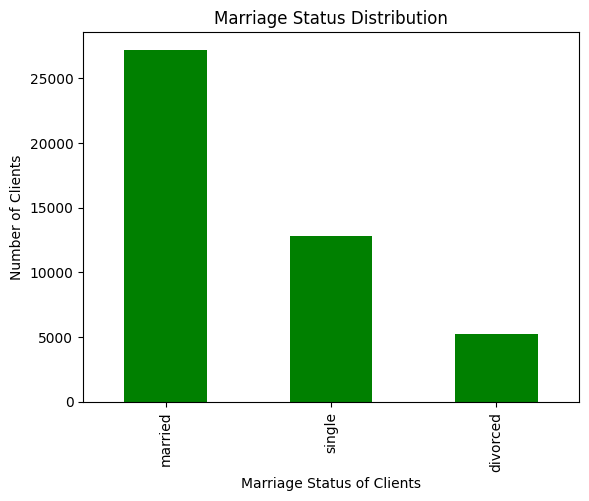

In [98]:
status_count.plot(kind='bar',color='green')
plt.title("Marriage Status Distribution")
plt.xlabel("Marriage Status of Clients")
plt.ylabel("Number of Clients")
plt.show()

Ans to Q3: 
- There are clients who are married, single or divorced.
- Total number of clients who are married: 27216
- Total number of clients who are single: 12790
- Total number of clients who are divorced: 5207
- No data on 3 entries (Nan values).
- Visualization done by bar graph.

# Q4: What is the level of education among the clients?

In [99]:
df.head()

,age,job,marital,marital_status,education,default,balance,housing,loan,contact,day,month,day_month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,married,tertiary,no,2143,yes,no,unknown,5,may,5-May,261,1,-1,0,unknown,no
1,44,technician,single,single,secondary,no,29,yes,no,unknown,5,may,5-May,151,1,-1,0,unknown,no
2,33,entrepreneur,married,married,secondary,no,2,yes,yes,unknown,5,may,5-May,76,1,-1,0,unknown,no
3,47,blue-collar,married,married,unknown,no,1506,yes,no,unknown,5,may,5-May,92,1,-1,0,unknown,no
4,33,unknown,single,single,unknown,no,1,no,no,unknown,5,may,5-May,198,1,-1,0,unknown,no


In [100]:
df['education'].unique()

array(['tertiary', 'secondary', 'unknown', 'primary', nan], dtype=object)

In [101]:
df_education=df.groupby(by='education')

In [102]:
education_level=df_education.size()
education_level=education_level.sort_values(ascending=False)

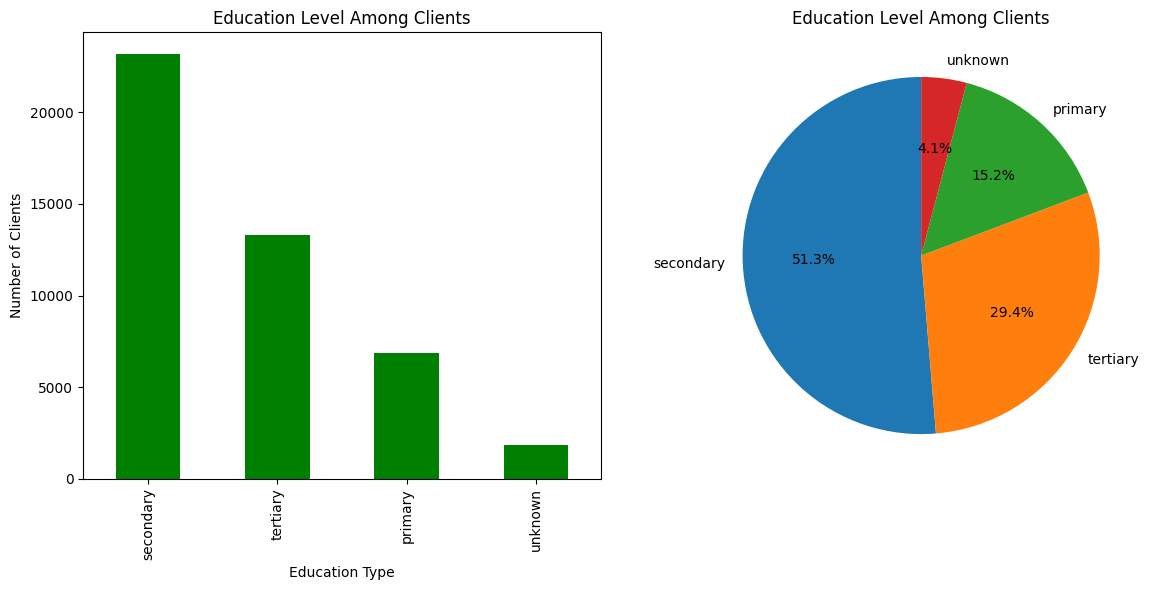

In [103]:
# Plots for the education level.
fig,axs=plt.subplots(1,2,figsize=(12,6))

education_level.plot(kind='bar',ax=axs[0],color='green')
axs[0].set_title("Education Level Among Clients")
axs[0].set_xlabel("Education Type")
axs[0].set_ylabel("Number of Clients")

education_level.plot(kind='pie',ax=axs[1],autopct='%1.1f%%',startangle=90)
axs[1].set_title("Education Level Among Clients")
angle=education_level/education_level.sum() * 360

plt.tight_layout()
plt.show()

Ans to Q4: 
- There are 4 types of entries in education level: Primary, Secondary, Tertiary and Unknown.
- Most number of clients have secondary level of eduction about 51% of all entries followed by tertiary level with 29.4% of clients.

# Q5: What proportion of clients have credit in default?

In [104]:
df.head()

,age,job,marital,marital_status,education,default,balance,housing,loan,contact,day,month,day_month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,married,tertiary,no,2143,yes,no,unknown,5,may,5-May,261,1,-1,0,unknown,no
1,44,technician,single,single,secondary,no,29,yes,no,unknown,5,may,5-May,151,1,-1,0,unknown,no
2,33,entrepreneur,married,married,secondary,no,2,yes,yes,unknown,5,may,5-May,76,1,-1,0,unknown,no
3,47,blue-collar,married,married,unknown,no,1506,yes,no,unknown,5,may,5-May,92,1,-1,0,unknown,no
4,33,unknown,single,single,unknown,no,1,no,no,unknown,5,may,5-May,198,1,-1,0,unknown,no


In [105]:
df_credit=df.groupby(by='default')

In [106]:
credit_default=df_credit.size()
credit_default

default
no     44401
yes      815
dtype: int64

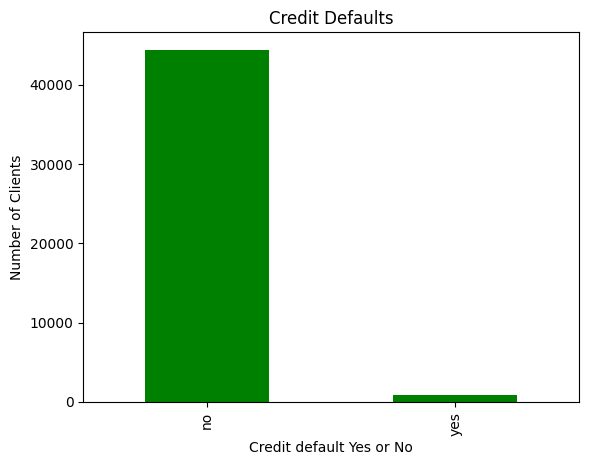

In [107]:
credit_default.plot(kind='bar',color='green')
plt.title("Credit Defaults")
plt.xlabel("Credit default Yes or No")
plt.ylabel("Number of Clients")
plt.show()

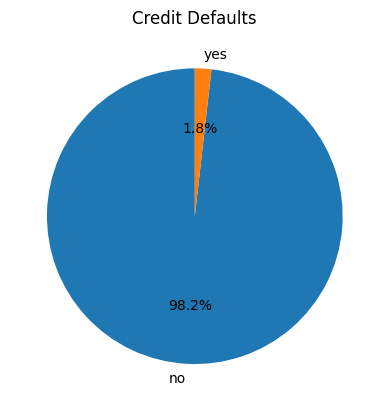

In [108]:
credit_default.plot(kind='pie',autopct='%1.1f%%',startangle=90)
plt.title("Credit Defaults")
angle=credit_default / credit_default.sum() *360

Ans to Q5:
- Proportion of clients with credit default is 1.8% of all clients or 815 entries.

# Q6:What is the distribution of average yearly balance among the clients?

In [109]:
df.head()

,age,job,marital,marital_status,education,default,balance,housing,loan,contact,day,month,day_month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,married,tertiary,no,2143,yes,no,unknown,5,may,5-May,261,1,-1,0,unknown,no
1,44,technician,single,single,secondary,no,29,yes,no,unknown,5,may,5-May,151,1,-1,0,unknown,no
2,33,entrepreneur,married,married,secondary,no,2,yes,yes,unknown,5,may,5-May,76,1,-1,0,unknown,no
3,47,blue-collar,married,married,unknown,no,1506,yes,no,unknown,5,may,5-May,92,1,-1,0,unknown,no
4,33,unknown,single,single,unknown,no,1,no,no,unknown,5,may,5-May,198,1,-1,0,unknown,no


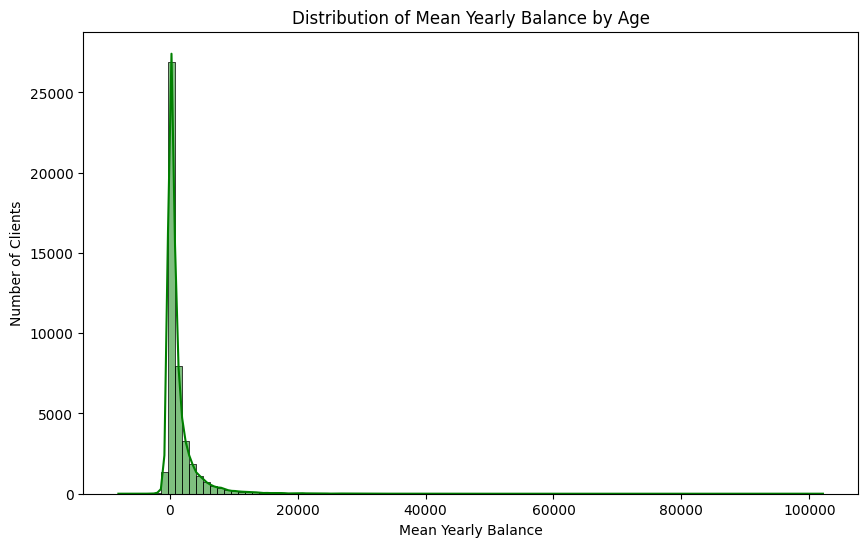

In [110]:
plt.figure(figsize=(10, 6))
sns.histplot(df['balance'], bins=100, color='green', edgecolor='black', kde=True)
plt.title('Distribution of Mean Yearly Balance by Age')
plt.xlabel('Mean Yearly Balance')
plt.ylabel('Number of Clients')
plt.show()

In [111]:
mean=np.mean(df['balance'])
median_salary=np.median(df['balance'])
std_salary=np.std(df['balance'])


print(f"In the given dataset, the mean salary of the clients (in euros) is {mean:.2f}.")
print(f"The median salary of the clients (in euros) is {median_salary:.2f}.")
print(f"The standard deviation along mean is {std_salary:.2f}.")


In the given dataset, the mean salary of the clients (in euros) is 1362.28.
The median salary of the clients (in euros) is 448.50.
The standard deviation along mean is 3044.58.


Ans to Q6:
- The mean salary of the clients (in euros) is 1362.28.
- The median salary of the clients (in euros) is 448.50.
- The standard deviation along mean is 3044.58.

# Q7:How many clients have housing loans?

In [112]:
df.head()

,age,job,marital,marital_status,education,default,balance,housing,loan,contact,day,month,day_month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,married,tertiary,no,2143,yes,no,unknown,5,may,5-May,261,1,-1,0,unknown,no
1,44,technician,single,single,secondary,no,29,yes,no,unknown,5,may,5-May,151,1,-1,0,unknown,no
2,33,entrepreneur,married,married,secondary,no,2,yes,yes,unknown,5,may,5-May,76,1,-1,0,unknown,no
3,47,blue-collar,married,married,unknown,no,1506,yes,no,unknown,5,may,5-May,92,1,-1,0,unknown,no
4,33,unknown,single,single,unknown,no,1,no,no,unknown,5,may,5-May,198,1,-1,0,unknown,no


In [113]:
# To calculate the number of clients that have housing loans we do the following by python pandas.

df_housing=(df['housing']=='yes').sum()

In [114]:
print("Number of clients having housing loans are:",df_housing)

Number of clients having housing loans are: 25130


Ans to Q7: 
- Number of clients having housing loans are 25130.

# Q8:How many clients have personal loans?

In [115]:
df.head()

,age,job,marital,marital_status,education,default,balance,housing,loan,contact,day,month,day_month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,married,tertiary,no,2143,yes,no,unknown,5,may,5-May,261,1,-1,0,unknown,no
1,44,technician,single,single,secondary,no,29,yes,no,unknown,5,may,5-May,151,1,-1,0,unknown,no
2,33,entrepreneur,married,married,secondary,no,2,yes,yes,unknown,5,may,5-May,76,1,-1,0,unknown,no
3,47,blue-collar,married,married,unknown,no,1506,yes,no,unknown,5,may,5-May,92,1,-1,0,unknown,no
4,33,unknown,single,single,unknown,no,1,no,no,unknown,5,may,5-May,198,1,-1,0,unknown,no


In [116]:
df_loan_count = (df['loan']=='yes').sum()
print("Number of clients having personal loans are:",df_housing)

Number of clients having personal loans are: 25130


Ans to Q7: 
- Number of clients having personal loans are 4367.
- NOTE: This number might also include housing loans as there might be intersection between these values.

# Q9:What are the communication types used for contacting clients during the campaign?

In [117]:
df.head()

,age,job,marital,marital_status,education,default,balance,housing,loan,contact,day,month,day_month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,married,tertiary,no,2143,yes,no,unknown,5,may,5-May,261,1,-1,0,unknown,no
1,44,technician,single,single,secondary,no,29,yes,no,unknown,5,may,5-May,151,1,-1,0,unknown,no
2,33,entrepreneur,married,married,secondary,no,2,yes,yes,unknown,5,may,5-May,76,1,-1,0,unknown,no
3,47,blue-collar,married,married,unknown,no,1506,yes,no,unknown,5,may,5-May,92,1,-1,0,unknown,no
4,33,unknown,single,single,unknown,no,1,no,no,unknown,5,may,5-May,198,1,-1,0,unknown,no


In [118]:
df['contact'].unique()

array(['unknown', 'cellular', 'telephone'], dtype=object)

In [119]:
df_comm_types=df.groupby(by='contact')

In [120]:
comm_types=df_comm_types.size()
comm_types=comm_types.sort_values(ascending=False)

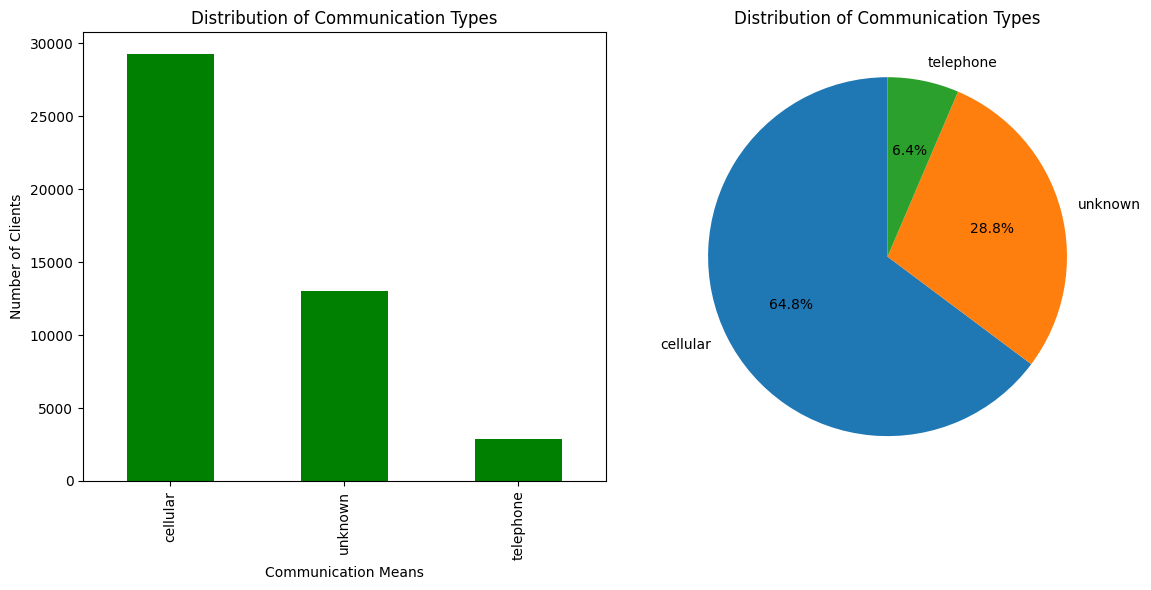

In [121]:
# Plots for the communication types.
fig,axs=plt.subplots(1,2,figsize=(12,6))

comm_types.plot(kind='bar',ax=axs[0],color='green')
axs[0].set_title("Distribution of Communication Types")
axs[0].set_xlabel("Communication Means")
axs[0].set_ylabel("Number of Clients")

comm_types.plot(kind='pie',ax=axs[1],autopct='%1.1f%%',startangle=90)
axs[1].set_title("Distribution of Communication Types")
angle=comm_types/comm_types.sum() * 360

plt.tight_layout()
plt.show()

Ans to Q8: 
- Three distinct communication types are used in contacting the clients these are:
        1. Unknown
        2. Cellular
        3. Telephone
- By far the cellular is the most used means of communication with ~65% clients contacted with celluar medium followed by unknown means of contact.
- The distribution of these is shown in pie chart as well as bar graph for visualization.


# Q10:What is the distribution of the last contact day of the month?

In [122]:
df.head()

,age,job,marital,marital_status,education,default,balance,housing,loan,contact,day,month,day_month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,married,tertiary,no,2143,yes,no,unknown,5,may,5-May,261,1,-1,0,unknown,no
1,44,technician,single,single,secondary,no,29,yes,no,unknown,5,may,5-May,151,1,-1,0,unknown,no
2,33,entrepreneur,married,married,secondary,no,2,yes,yes,unknown,5,may,5-May,76,1,-1,0,unknown,no
3,47,blue-collar,married,married,unknown,no,1506,yes,no,unknown,5,may,5-May,92,1,-1,0,unknown,no
4,33,unknown,single,single,unknown,no,1,no,no,unknown,5,may,5-May,198,1,-1,0,unknown,no


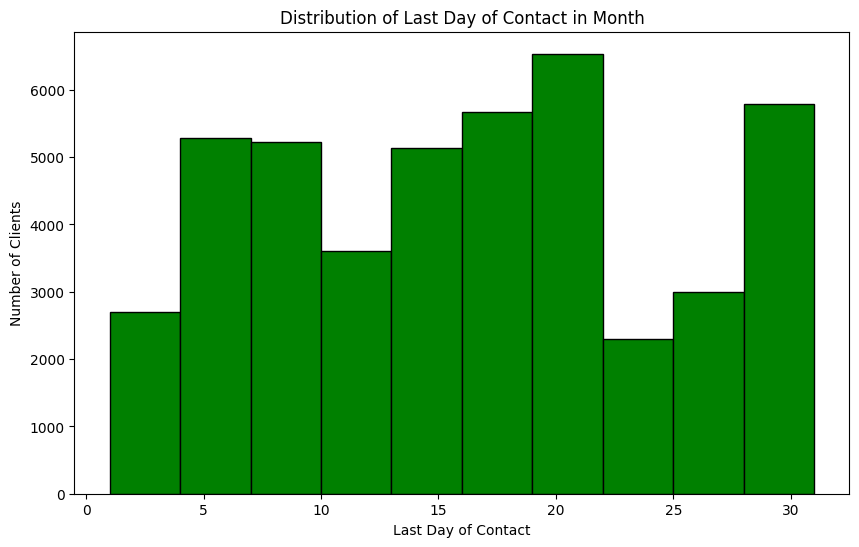

In [123]:
plt.figure(figsize=(10, 6))
plt.hist(df['day'], bins=10, color='green', edgecolor='black')
plt.title('Distribution of Last Day of Contact in Month')
plt.xlabel('Last Day of Contact')
plt.ylabel('Number of Clients')
plt.show()

Ans to Q10:
- The distribution is represented in histogram.
- Higher number of contacts were made between 15-20th days of the month.

# Q11: How does the last contact month vary among the clients?

In [124]:
df_month=df.groupby(by='month')

In [125]:
months=df_month.size()
months=months.sort_values(ascending=False)

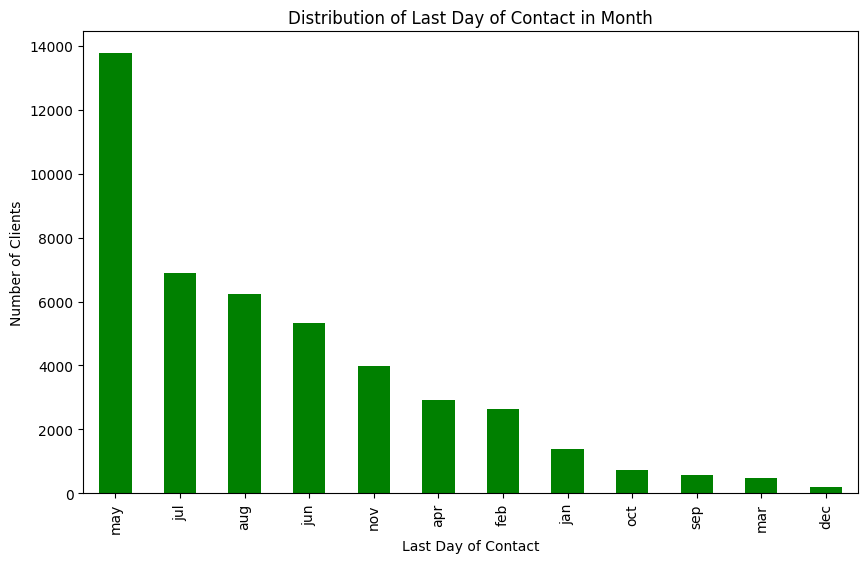

In [126]:
plt.figure(figsize=(10, 6))
months.plot(kind='bar',color='green')
plt.title('Distribution of Last Day of Contact in Month')
plt.xlabel('Last Day of Contact')
plt.ylabel('Number of Clients')
plt.show()

Ans to Q11: 
- The distribution among clients as per last contact month is shown in the bar plot.
- The most number of customers were called in the month of *may* and least number of clients on *december*.

# Q12: What is the distribution of the duration of the last contact?

In [127]:
df.head()

,age,job,marital,marital_status,education,default,balance,housing,loan,contact,day,month,day_month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,married,tertiary,no,2143,yes,no,unknown,5,may,5-May,261,1,-1,0,unknown,no
1,44,technician,single,single,secondary,no,29,yes,no,unknown,5,may,5-May,151,1,-1,0,unknown,no
2,33,entrepreneur,married,married,secondary,no,2,yes,yes,unknown,5,may,5-May,76,1,-1,0,unknown,no
3,47,blue-collar,married,married,unknown,no,1506,yes,no,unknown,5,may,5-May,92,1,-1,0,unknown,no
4,33,unknown,single,single,unknown,no,1,no,no,unknown,5,may,5-May,198,1,-1,0,unknown,no


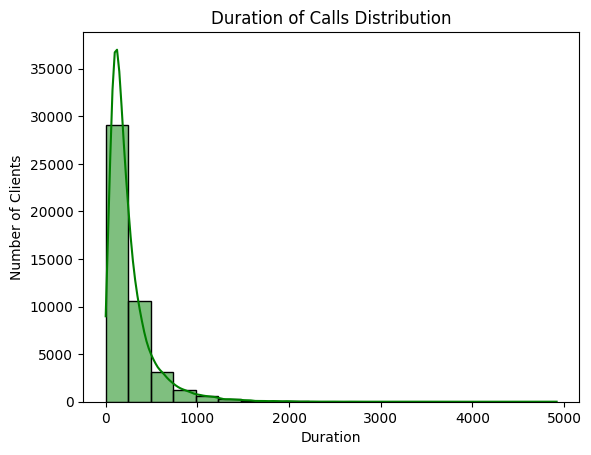

In [128]:
sns.histplot(df['duration'], bins=20, color='green', edgecolor='black', kde=True)
plt.title("Duration of Calls Distribution")
plt.xlabel("Duration")
plt.ylabel("Number of Clients")
plt.show()

In [129]:
mean_duration = df['duration'].mean()
median_duration = df['duration'].median()
std_dev_duration = df['duration'].std()

print(f"The mean duration of contact is {mean_duration:.2f}")
print(f"The median duration of the contact is {mean_duration:.2f}")
print(f"The standard deviation is expected to be {std_dev_duration:.2f}")

The mean duration of contact is 258.17
The median duration of the contact is 258.17
The standard deviation is expected to be 257.52


Ans to Q12:
- Distribution is shown in histogram along with KDE plot.
- The mean duration of contact is 258.17
- The median duration of the contact is 258.17
- The standard deviation is expected to be 257.52

# Q13:How many contacts were performed during the campaign for each client?

In [130]:
df.head()

,age,job,marital,marital_status,education,default,balance,housing,loan,contact,day,month,day_month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,married,tertiary,no,2143,yes,no,unknown,5,may,5-May,261,1,-1,0,unknown,no
1,44,technician,single,single,secondary,no,29,yes,no,unknown,5,may,5-May,151,1,-1,0,unknown,no
2,33,entrepreneur,married,married,secondary,no,2,yes,yes,unknown,5,may,5-May,76,1,-1,0,unknown,no
3,47,blue-collar,married,married,unknown,no,1506,yes,no,unknown,5,may,5-May,92,1,-1,0,unknown,no
4,33,unknown,single,single,unknown,no,1,no,no,unknown,5,may,5-May,198,1,-1,0,unknown,no


In [131]:
df['campaign'].unique()

array([ 1,  2,  3,  5,  4,  6,  7,  8,  9, 10, 11, 12, 13, 19, 14, 24, 16,
       32, 18, 22, 15, 17, 25, 21, 43, 51, 63, 41, 26, 28, 55, 50, 38, 23,
       20, 29, 31, 37, 30, 46, 27, 58, 33, 35, 34, 36, 39, 44],
      dtype=int64)

In [132]:
campaign_contacts = df.groupby("campaign").size()

In [133]:
print(campaign_contacts)

campaign
1     17548
2     12506
3      5521
4      3522
5      1764
6      1291
7       735
8       540
9       327
10      266
11      201
12      155
13      133
14       93
15       84
16       79
17       69
18       51
19       44
20       43
21       35
22       23
23       22
24       20
25       22
26       13
27       10
28       16
29       16
30        8
31       12
32        9
33        6
34        5
35        4
36        4
37        2
38        3
39        1
41        2
43        3
44        1
46        1
50        2
51        1
55        1
58        1
63        1
dtype: int64


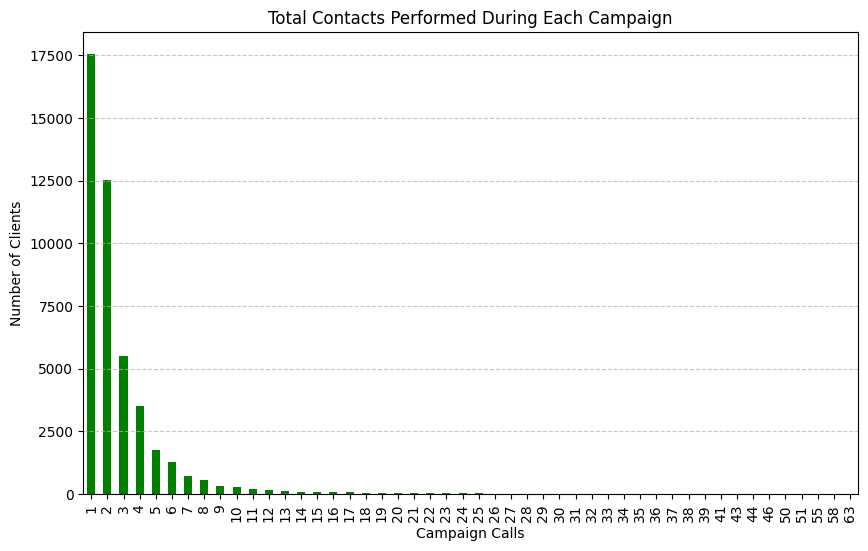

In [134]:
campaign_contacts.plot(kind='bar', figsize=(10, 6), color='green')

plt.title('Total Contacts Performed During Each Campaign')
plt.xlabel('Campaign Calls')
plt.ylabel('Number of Clients')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

Ans to Q13:
- 17546 people were contacted for single time followed by 12506 people called for two times.
- Rest were called multiple times.
- Someone was approached 63 times which is the higest times anyone has been contacted during campaign.

# Q14:What is the distribution of the number of days passed since the client was last contacted from a previous campaign?

In [135]:
df.head()

,age,job,marital,marital_status,education,default,balance,housing,loan,contact,day,month,day_month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,married,tertiary,no,2143,yes,no,unknown,5,may,5-May,261,1,-1,0,unknown,no
1,44,technician,single,single,secondary,no,29,yes,no,unknown,5,may,5-May,151,1,-1,0,unknown,no
2,33,entrepreneur,married,married,secondary,no,2,yes,yes,unknown,5,may,5-May,76,1,-1,0,unknown,no
3,47,blue-collar,married,married,unknown,no,1506,yes,no,unknown,5,may,5-May,92,1,-1,0,unknown,no
4,33,unknown,single,single,unknown,no,1,no,no,unknown,5,may,5-May,198,1,-1,0,unknown,no


In [136]:
len(df['pdays'].unique())

559

In [137]:
df_pdays=df.groupby(by='pdays')
pdays_count=df_pdays.size()

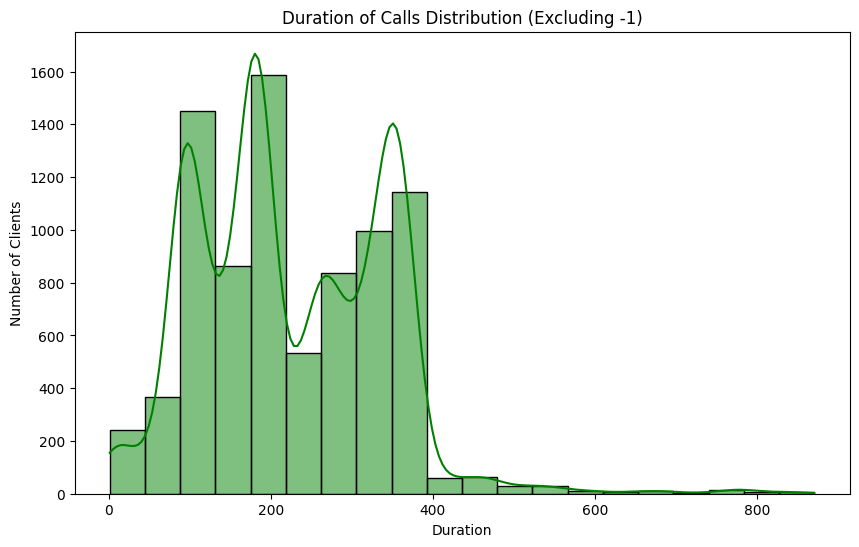

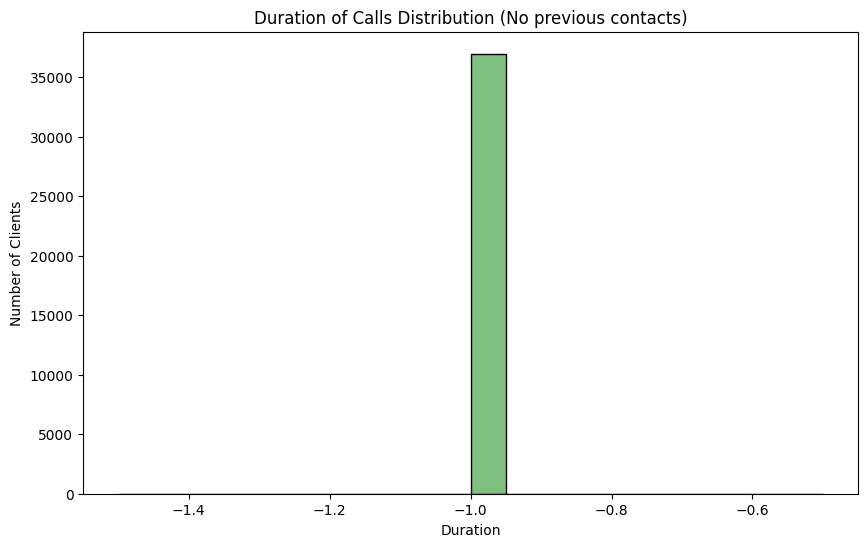

In [138]:
# Filter out -1 values
filtered_pdays = df[df['pdays'] != -1]['pdays']

plt.figure(figsize=(10, 6))
sns.histplot(filtered_pdays, bins=20, color='green', edgecolor='black', kde=True)
plt.title("Duration of Calls Distribution (Excluding -1)")
plt.xlabel("Duration")
plt.ylabel("Number of Clients")
plt.show()

# With -1 values
filtered_pdays_all = df[df['pdays']==-1]['pdays']
plt.figure(figsize=(10, 6))
sns.histplot(filtered_pdays_all, bins=20, color='green', edgecolor='black', kde=True)
plt.title("Duration of Calls Distribution (No previous contacts)")
plt.xlabel("Duration")
plt.ylabel("Number of Clients")
plt.show()

In [139]:
df[df['pdays']==-1]['pdays']

0       -1
1       -1
2       -1
3       -1
4       -1
        ..
45206   -1
45207   -1
45209   -1
45211   -1
45215   -1
Name: pdays, Length: 36956, dtype: int64

Ans to Q14: 
- Most of the customers contacted are new as 36956 new contacts were made during the campagin.
- Rest were contacted atleast once before. There are instances where people were contacted after 800+ days.

# Q15:How many contacts were performed before the current campaign for each client?

In [140]:
df.head()

,age,job,marital,marital_status,education,default,balance,housing,loan,contact,day,month,day_month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,married,tertiary,no,2143,yes,no,unknown,5,may,5-May,261,1,-1,0,unknown,no
1,44,technician,single,single,secondary,no,29,yes,no,unknown,5,may,5-May,151,1,-1,0,unknown,no
2,33,entrepreneur,married,married,secondary,no,2,yes,yes,unknown,5,may,5-May,76,1,-1,0,unknown,no
3,47,blue-collar,married,married,unknown,no,1506,yes,no,unknown,5,may,5-May,92,1,-1,0,unknown,no
4,33,unknown,single,single,unknown,no,1,no,no,unknown,5,may,5-May,198,1,-1,0,unknown,no


In [141]:
df['previous'].unique()

array([  0,   3,   1,   4,   2,  11,  16,   6,   5,  10,  12,   7,  18,
         9,  21,   8,  14,  15,  26,  37,  13,  25,  20,  27,  17,  23,
        38,  29,  24,  51, 275,  22,  19,  30,  58,  28,  32,  40,  55,
        35,  41], dtype=int64)

In [142]:
df_pre=df.groupby(by='previous')
previous_values = df_pre.size()

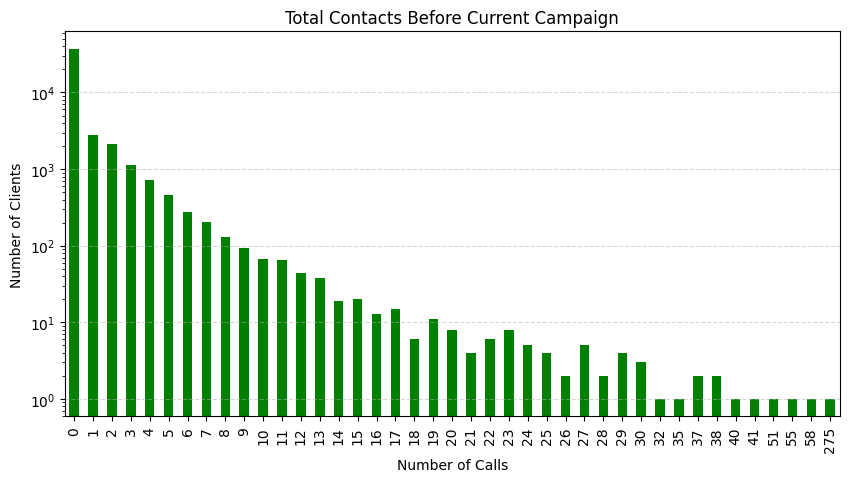

In [143]:
previous_values.plot(kind='bar', figsize=(10, 5), color='green')

plt.title('Total Contacts Before Current Campaign')
plt.xlabel('Number of Calls')
plt.ylabel('Number of Clients')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.yscale('log')

plt.show()

Ans to Q15: 
- The visuvalization was done using bar plot.
- There is an outlier at 275 number of calles for a single person.

# Q16:What were the outcomes of the previous marketing campaigns?

In [144]:
df.head()

,age,job,marital,marital_status,education,default,balance,housing,loan,contact,day,month,day_month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,married,tertiary,no,2143,yes,no,unknown,5,may,5-May,261,1,-1,0,unknown,no
1,44,technician,single,single,secondary,no,29,yes,no,unknown,5,may,5-May,151,1,-1,0,unknown,no
2,33,entrepreneur,married,married,secondary,no,2,yes,yes,unknown,5,may,5-May,76,1,-1,0,unknown,no
3,47,blue-collar,married,married,unknown,no,1506,yes,no,unknown,5,may,5-May,92,1,-1,0,unknown,no
4,33,unknown,single,single,unknown,no,1,no,no,unknown,5,may,5-May,198,1,-1,0,unknown,no


In [145]:
df['poutcome'].unique()

array(['unknown', 'failure', 'other', 'success'], dtype=object)

In [146]:
df_outcome = df.groupby(by='poutcome')
outcomes = df_outcome.size()
outcomes = outcomes.sort_values(ascending=False)
outcomes

poutcome
unknown    36961
failure     4902
other       1840
success     1513
dtype: int64

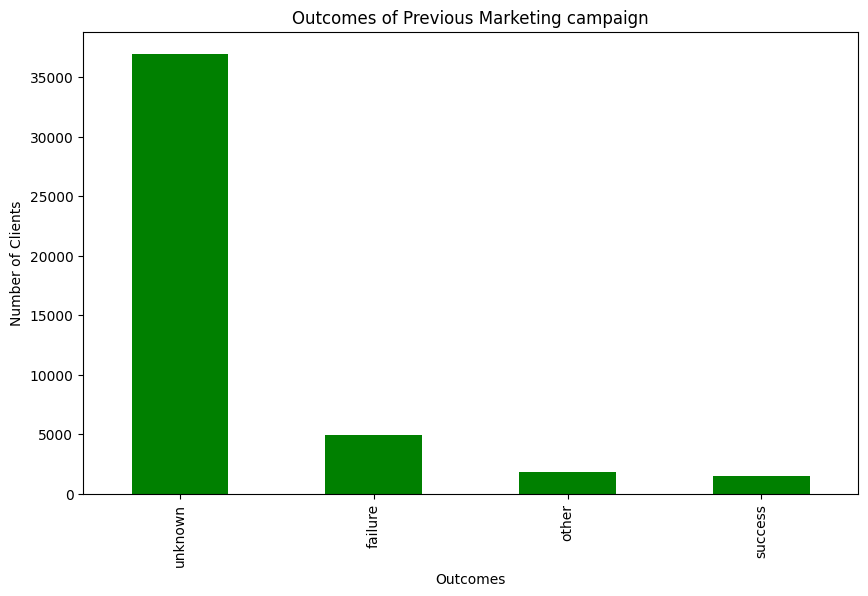

In [147]:
plt.figure(figsize=(10,6))
outcomes.plot(kind='bar',color='green')
plt.title("Outcomes of Previous Marketing campaign")
plt.xlabel('Outcomes')
plt.ylabel('Number of Clients')
plt.show()

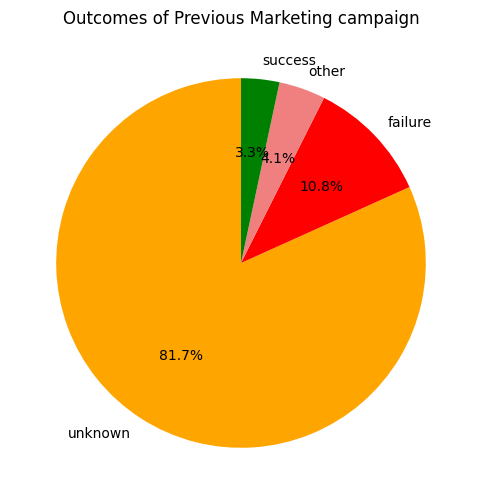

In [148]:
plt.figure(figsize=(10,6))
colors = ['orange', 'red', 'lightcoral', 'green']
outcomes.plot(kind='pie',autopct='%1.1f%%',startangle=90,colors=colors)
plt.title("Outcomes of Previous Marketing campaign")
angle=outcomes/outcomes.sum() * 360
plt.show()

Ans to Q16:
- Almost 82% of people communicated in previous marketing campaign had an unknown outcome.
- 11% contacts in a campaign was a failure.
- Only 3.3% contacts involoved on the campaign was successful.

# Q17:What is the distribution of clients who subscribed to a term deposit vs. those who did not?

In [149]:
df.head()

,age,job,marital,marital_status,education,default,balance,housing,loan,contact,day,month,day_month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,married,tertiary,no,2143,yes,no,unknown,5,may,5-May,261,1,-1,0,unknown,no
1,44,technician,single,single,secondary,no,29,yes,no,unknown,5,may,5-May,151,1,-1,0,unknown,no
2,33,entrepreneur,married,married,secondary,no,2,yes,yes,unknown,5,may,5-May,76,1,-1,0,unknown,no
3,47,blue-collar,married,married,unknown,no,1506,yes,no,unknown,5,may,5-May,92,1,-1,0,unknown,no
4,33,unknown,single,single,unknown,no,1,no,no,unknown,5,may,5-May,198,1,-1,0,unknown,no


In [150]:
df_final_outcome=df.groupby(by='y')
target_outcome=df_final_outcome.size()
target_outcome

y
no     39922
yes     5294
dtype: int64

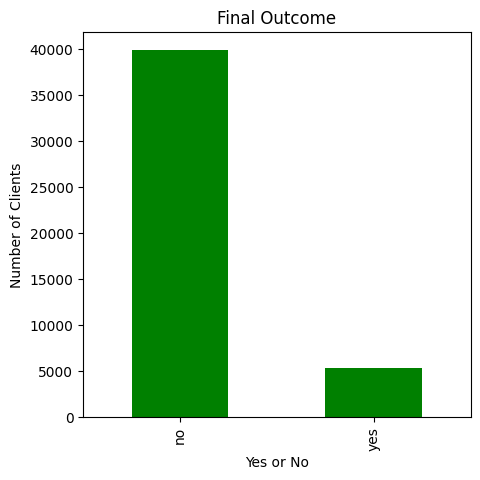

In [151]:
plt.figure(figsize=(5,5))
target_outcome.plot(kind='bar',color='green')
plt.title("Final Outcome")
plt.xlabel('Yes or No')
plt.ylabel('Number of Clients')
plt.show()

Ans to Q17:
- Total of 39922 clients were not subscribed to the term deposit and 5294 were subscribed.

# Q18:Are there any correlations between different attributes and the likelihood of subscribing to a term deposit?

In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45216 entries, 0 to 45215
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             45216 non-null  int64 
 1   job             45216 non-null  object
 2   marital         45213 non-null  object
 3   marital_status  45213 non-null  object
 4   education       45213 non-null  object
 5   default         45216 non-null  object
 6   balance         45216 non-null  int64 
 7   housing         45216 non-null  object
 8   loan            45216 non-null  object
 9   contact         45216 non-null  object
 10  day             45216 non-null  int64 
 11  month           45216 non-null  object
 12  day_month       45216 non-null  object
 13  duration        45216 non-null  int64 
 14  campaign        45216 non-null  int64 
 15  pdays           45216 non-null  int64 
 16  previous        45216 non-null  int64 
 17  poutcome        45216 non-null  object
 18  y     

In [153]:
numeric_df = df.select_dtypes(include=['int64','float64'])

In [154]:
corr_matrix= numeric_df.corr()

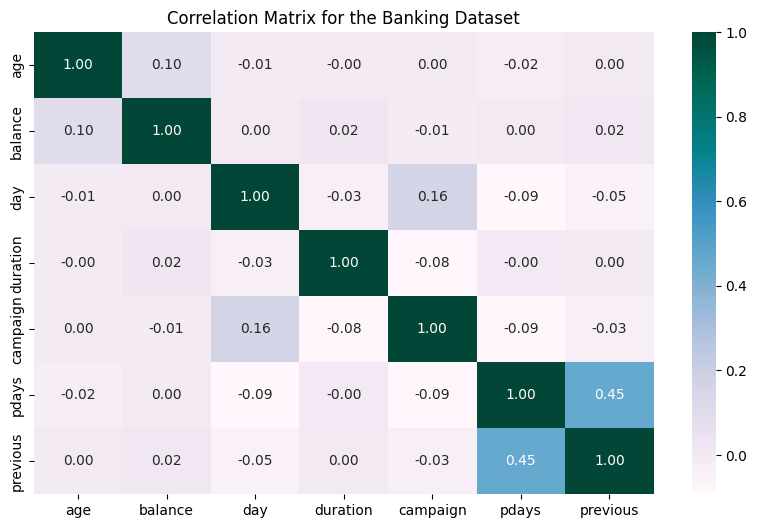

In [155]:
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix,annot=True,cmap='PuBuGn',fmt=".2f")
plt.title("Correlation Matrix for the Banking Dataset")
plt.show()